In [6]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import random
# Constants
EMPTY = 0
PLAYER_X = 1
PLAYER_O = -1
DRAW = 0
GAMMA = 0.5  # Discount factor for DP
EPSILON = 0.1  # Exploration factor for epsilon-greedy
ALPHA = 0.1  # Learning rate
BOARD_SIZE_4x4 = 4
BOARD_SIZE_5x5 = 5

# Initialize board
def create_board(size):
    return np.zeros((size, size), dtype=int)


In [7]:

# Function to create an empty board
def create_board(size):
    return np.zeros((size, size), dtype=int)

# Function to check for a winner
def check_winner(board):
    size = board.shape[0]
    for player in [PLAYER_X, PLAYER_O]:
        # Check rows, columns, and diagonals for a win
        for i in range(size):
            if all(board[i, :] == player) or all(board[:, i] == player):
                return player
        if all([board[i, i] == player for i in range(size)]) or all([board[i, size - 1 - i] == player for i in range(size)]):
            return player
    if np.all(board != EMPTY):
        return 0  # Draw
    return None  # Game not finished

class SARSA_Agent:
    def __init__(self, size):
        self.size = size
        self.q_values = defaultdict(lambda: np.zeros(size * size))  # Q(s,a)
    
    def state_to_string(self, board):
        """Convert board state to a string for a hashable state."""
        return str(board.reshape(self.size * self.size))

    def get_possible_actions(self, board):
        """Get possible actions (empty cells)."""
        return list(zip(*np.where(board == EMPTY)))

    def choose_action(self, board, player):
        """Epsilon-greedy policy to choose the next action."""
        state = self.state_to_string(board)
        possible_actions = self.get_possible_actions(board)
        if np.random.rand() < EPSILON:
            # Explore: choose random action
            return possible_actions[np.random.choice(len(possible_actions))]
        else:
            # Exploit: choose the best action based on Q-values
            q_values_state = self.q_values[state]
            best_action = None
            best_value = -np.inf
            for action in possible_actions:
                action_index = action[0] * self.size + action[1]
                if q_values_state[action_index] > best_value:
                    best_value = q_values_state[action_index]
                    best_action = action
            return best_action

    def update_q_values(self, state, action, reward, next_state, next_action):
        """SARSA update rule for Q-values."""
        state_key = self.state_to_string(state)
        next_state_key = self.state_to_string(next_state)

        action_index = action[0] * self.size + action[1]
        next_action_index = next_action[0] * self.size + next_action[1] if next_action else 0

        # SARSA update formula
        self.q_values[state_key][action_index] += ALPHA * (reward + GAMMA * self.q_values[next_state_key][next_action_index] - self.q_values[state_key][action_index])

    def play_game(self, opponent='random'):
        """Simulate a game between the SARSA agent and a random opponent."""
        board = create_board(self.size)
        player = PLAYER_X
        history = []

        # Initialize the first action
        state = board.copy()
        action = self.choose_action(board, player)

        while True:
            history.append((state.copy(), action))
            board[action] = player

            winner = check_winner(board)
            if winner is not None:
                reward = 1 if winner == PLAYER_X else -1 if winner == PLAYER_O else 0
                self.update_q_values(state, action, reward, board, None)  # Final step has no next action
                return winner

            # Switch player
            player = -player

            # If opponent is random
            if opponent == 'random':
                # Opponent (PLAYER_O) random action
                if player == PLAYER_O:
                    opponent_action = random.choice(self.get_possible_actions(board))
                    board[opponent_action] = PLAYER_O
                    winner = check_winner(board)
                    if winner is not None:
                        reward = -1 if winner == PLAYER_O else 0
                        self.update_q_values(state, action, reward, board, None)
                        return winner
                    player = -player  # Switch back to agent

            # Next state and action for the SARSA agent
            next_state = board.copy()
            next_action = self.choose_action(board, PLAYER_X)
            reward = 0  # No reward for intermediate steps

            self.update_q_values(state, action, reward, next_state, next_action)

            # Update state and action for the next iteration
            state = next_state
            action = next_action

    def train(self, episodes):
        win_count = 0
        win_rates = []

        for episode in range(episodes):
            winner = self.play_game()
            if winner == PLAYER_X:
                win_count += 1

            if (episode + 1) % 100 == 0:
                win_rate = win_count / (episode + 1)
                win_rates.append(win_rate)
                print(f"Episode {episode + 1}: Win rate = {win_rate:.3f}")

        return win_rates


In [8]:
def plot_win_rate(win_rates, board_size):
    plt.plot(win_rates)
    plt.xlabel('Episodes (x100)')
    plt.ylabel('Win Rate')
    plt.title(f'Agent Win Rate Over Time (Board Size: {board_size}x{board_size})')
    plt.show()

Episode 100: Win rate = 0.710
Episode 200: Win rate = 0.665
Episode 300: Win rate = 0.660
Episode 400: Win rate = 0.667
Episode 500: Win rate = 0.670
Episode 600: Win rate = 0.693
Episode 700: Win rate = 0.690
Episode 800: Win rate = 0.684
Episode 900: Win rate = 0.687
Episode 1000: Win rate = 0.676
Episode 1100: Win rate = 0.675
Episode 1200: Win rate = 0.677
Episode 1300: Win rate = 0.674
Episode 1400: Win rate = 0.669
Episode 1500: Win rate = 0.673
Episode 1600: Win rate = 0.670
Episode 1700: Win rate = 0.674
Episode 1800: Win rate = 0.673
Episode 1900: Win rate = 0.671
Episode 2000: Win rate = 0.671
Episode 2100: Win rate = 0.672
Episode 2200: Win rate = 0.671
Episode 2300: Win rate = 0.675
Episode 2400: Win rate = 0.673
Episode 2500: Win rate = 0.674
Episode 2600: Win rate = 0.674
Episode 2700: Win rate = 0.675
Episode 2800: Win rate = 0.677
Episode 2900: Win rate = 0.675
Episode 3000: Win rate = 0.675
Episode 3100: Win rate = 0.674
Episode 3200: Win rate = 0.675
Episode 3300: Win

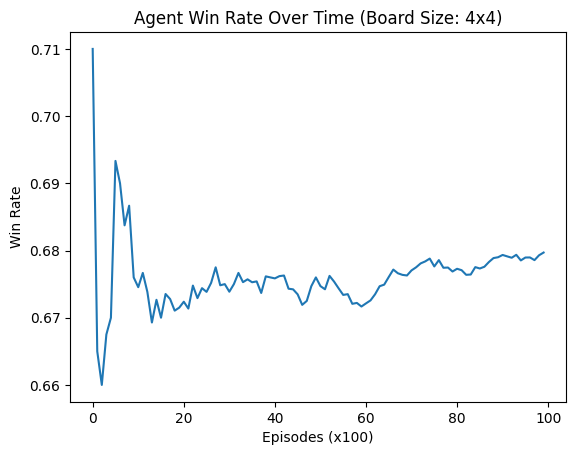

Episode 100: Win rate = 0.700
Episode 200: Win rate = 0.710
Episode 300: Win rate = 0.710
Episode 400: Win rate = 0.690
Episode 500: Win rate = 0.690
Episode 600: Win rate = 0.682
Episode 700: Win rate = 0.689
Episode 800: Win rate = 0.693
Episode 900: Win rate = 0.690
Episode 1000: Win rate = 0.679
Episode 1100: Win rate = 0.671
Episode 1200: Win rate = 0.672
Episode 1300: Win rate = 0.673
Episode 1400: Win rate = 0.677
Episode 1500: Win rate = 0.675
Episode 1600: Win rate = 0.680
Episode 1700: Win rate = 0.676
Episode 1800: Win rate = 0.673
Episode 1900: Win rate = 0.676
Episode 2000: Win rate = 0.676
Episode 2100: Win rate = 0.675
Episode 2200: Win rate = 0.675
Episode 2300: Win rate = 0.673
Episode 2400: Win rate = 0.673
Episode 2500: Win rate = 0.671
Episode 2600: Win rate = 0.670
Episode 2700: Win rate = 0.671
Episode 2800: Win rate = 0.671
Episode 2900: Win rate = 0.671
Episode 3000: Win rate = 0.673
Episode 3100: Win rate = 0.672
Episode 3200: Win rate = 0.672
Episode 3300: Win

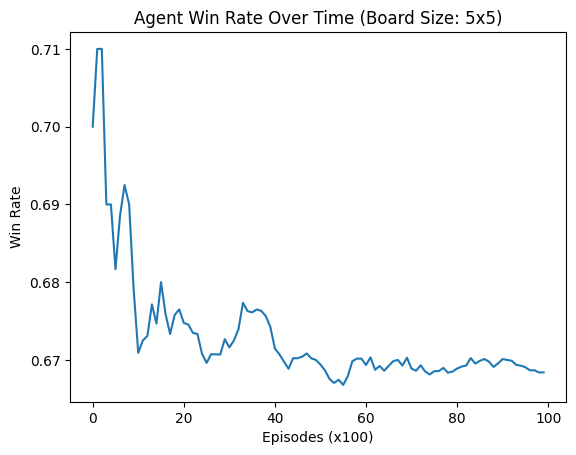

In [9]:
if __name__ == '__main__':
    agent_4x4 = SARSA_Agent(BOARD_SIZE_4x4)
    win_rate_4x4 = agent_4x4.train(10000)
    
    # Plotting win rate\
    plot_win_rate(win_rate_4x4, BOARD_SIZE_4x4)

    # Train and plot for 5x5 board
    agent_5x5 = SARSA_Agent(BOARD_SIZE_5x5)
    win_rates_5x5 = agent_5x5.train(10000)
    plot_win_rate(win_rates_5x5, BOARD_SIZE_5x5)
